In [3]:
import time
import datetime
t1 = time.gmtime(1284286794)
t1
time.struct_time(tm_year=2010, tm_mon=9, tm_mday=12, tm_hour=10, tm_min=19, 
                 tm_sec=54, tm_wday=6, tm_yday=255, tm_isdst=0)

TypeError: structseq() takes at most 2 keyword arguments (9 given)

In [4]:
datetime.datetime.fromtimestamp(1284286794)
datetime.datetime(2010, 9, 12, 11, 19, 54)

datetime.datetime(2010, 9, 12, 11, 19, 54)

In [6]:
ts_epoch = 1362301382
ts = datetime.datetime.fromtimestamp(ts_epoch).strftime('%Y-%m-%d %H:%M:%S')
ts

'2013-03-03 14:33:02'

In [8]:
from datetime import datetime, timezone
datetime.fromtimestamp(ts_epoch, timezone.utc)

datetime.datetime(2013, 3, 3, 9, 3, 2, tzinfo=datetime.timezone.utc)

In [30]:
import pandas as pd
from graphviz import Digraph
import networkx as nx

# Read the CSV file
df = pd.read_csv("soc-sign-bitcoinalpha.csv")
df

,SOURCE,TARGET,RATING,TIME
0,7188,1,10,1407470400
1,430,1,10,1376539200
2,3134,1,10,1369713600
3,3026,1,10,1350014400
4,3010,1,10,1347854400
...,...,...,...,...
24181,7604,7601,10,1364270400
24182,7601,7604,10,1364270400
24183,7604,7602,10,1364270400
24184,7602,7604,10,1364270400


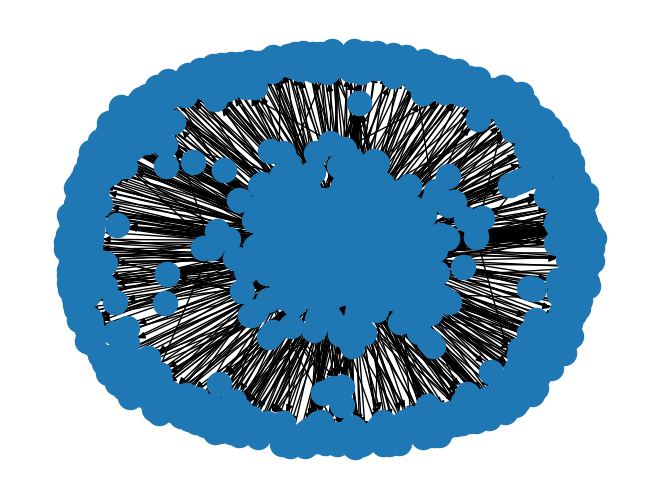

In [33]:
graph = nx.DiGraph()

# Add nodes to the graph
for index, row in df.iterrows():
    graph.add_edge(row['SOURCE'],row['TARGET'])
nx.draw(graph)

In [35]:
import matplotlib.pyplot as plt

plt.draw()
plt.show()

<Figure size 640x480 with 0 Axes>

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
import collections

file = None  # open('out', 'w')
plotOn = True
g = nx.DiGraph()


def create_graph():
    with open('/Users/hirvapatel/Documents/Semester 6-2/Data Sciecne/Project 35% ka/soc-sign-bitcoinalpha.csv') as f:
        for row in f:
            s = row.split(',')
            # print(s[2])
            g.add_edge(s[0], s[1], weight=int(s[2]))


def compute_trust(g):
    trust = [0]*7605  # This because our indexes are until the number 7604

    with open('/Users/hirvapatel/Documents/Semester 6-2/Data Sciecne/Project 35% ka/soc-sign-bitcoinalpha.csv') as f:
        for row in f:
            s = row.split(',')
            trust[int(s[1])] = trust[int(s[1])] + int(s[2])

    count = 0
    for x in trust:
        if x == 0:
            count += 1
            continue
        print(count, x)
        count += 1

    if plotOn:
        # in_degree = dict(g.in_degree(weight='weight'))
        out_degree = dict(g.out_degree(weight='weight'))
        import operator
        sorted_d = sorted(out_degree.items(), key=operator.itemgetter(1), reverse=True)  # Change to indegree if we want indegree
        print(sorted_d)
        trust_list = []
        for k, v in sorted_d:
            trust_list.append(v)
        plot_distribution(trust_list, 'Out-Degree')  # Change to indegree if we want indegree


def draw_graph(g):
    nx.draw_networkx(g, node_size=50, font_size=2, arrowsize=3, node_color='b')
    plt.show()


# Centrality can be calculated by Degrees, Closeness or Betweenness.
def compute_centrality(g):
    nodes_degrees = nx.degree_centrality(g)
    # nodes_degrees = nx.closeness_centrality(g)
    # nodes_degrees = nx.betweenness_centrality(g)

    max_centrality = max(nodes_degrees, key=nodes_degrees.get)
    print('\n\tNode with Max number of Edges: ', max_centrality,
          ' || Degree: ', nodes_degrees[max_centrality], file=file)

    return max_centrality


def print_node_degrees(g, node):
    print('\tDegrees data for node ', node, file=file)
    print('\t\tMost important node In-Degree:', g.in_degree(node),
          ' || Weighted: ', g.in_degree(node, weight='weight'), file=file)
    print('\t\tMost important node Out-Degree:', g.out_degree(node),
          ' || Weighted: ', g.out_degree(node, weight='weight'), file=file)
    print('\t\tMost important node Total-Degree:', g.degree(node),
          ' || Weighted: ', g.degree(node, weight='weight'), file=file)


def plot_distribution(values, label):
    values_count = collections.Counter(values)
    val, cnt = zip(*values_count.items())

    fig, ax = plt.subplots()
    plt.bar(val, cnt, width=0.80, color='b')

    plt.title(label + " Histogram")
    plt.ylabel("Count")
    plt.xlabel(label)
    ax.set_xticks([v + 0.4 for v in val])
    ax.set_xticklabels(val)
    ax.set_xscale('log')
    ax.set_yscale('log')

    plt.show()


def compute_component(comps):
    print('\t\tNumber of components:', len(comps), file=file)

    diameters = [nx.diameter(comp.to_undirected()) for comp in comps]
    print('\t\tDiameter max:', max(diameters), file=file)
    print('\t\tDiameter min:', min(diameters), file=file)
    print('\t\tDiameter avg:', sum(diameters) / len(diameters), file=file)
    if plotOn:
        plot_distribution(diameters, 'diameter')

    giant_comp = max(comps, key=len)  # This is a subgraph that we have to study
    compute_centrality(giant_comp)
    print('\tGiant component:', file=file)
    print('\t\tNumber of nodes:', giant_comp.number_of_nodes(), file=file)
    print('\t\tNumber of edges:', giant_comp.number_of_edges(), file=file)

    indegree = dict(giant_comp.in_degree())
    outdegree = dict(giant_comp.out_degree())
    degree = dict(giant_comp.degree())
    if plotOn:
        plot_distribution(indegree.values(), 'indegree component')
        plot_distribution(outdegree.values(), 'outdegree component')
        plot_distribution(degree.values(), 'degree')

    print('\t\tMost important node is: \n\t\t\tIn-Degree ', max(indegree), ' || Out-Degree: ', max(outdegree),
          ' || Total Degree: ', max(degree), file=file)

    print("\t\tDensity:", nx.density(giant_comp), file=file)
    print('\t\tAverage clustering', nx.average_clustering(nx.Graph(giant_comp)), file=file)

    return giant_comp


def do_computations(g):
    print('Bitcoin Alpha Graph:', file=file)
    print('\tNumber of nodes:', g.number_of_nodes(), file=file)
    print('\tNumber of edges:', g.number_of_edges(), file=file)
    # print('\tNumber of self-loops:', g.number_of_selfloops(), file=file)

    max_centrality = compute_centrality(g)  # Need to set how to calculate centrality inside the function
    print_node_degrees(g, max_centrality)
    print_node_degrees(g, ['2', '3', '4', '7'])  # These are other important nodes

    print('\n\tNumber of triangles:', sum(nx.triangles(g.to_undirected()).values()) / 3, file=file)
    print('\tAverage clustering:', nx.average_clustering(g.to_undirected()), file=file)

    print('\n\tStrongly connected components:', file=file)
    connected_comps_strong = list(nx.strongly_connected_components(g))
    strong_giant = compute_component(connected_comps_strong)
    print('\tAverage shortest path length', nx.average_shortest_path_length(strong_giant), file=file)

    print('\n\tWeakly connected components:', file=file)
    connected_comps_weak = list(nx.weakly_connected_component_subgraphs(g))
    weak_giant = compute_component(connected_comps_weak)


# Just activate functions that you want to launch.
def main():
    # compute_trust(g)
    do_computations(g)
    # draw_graph(g)


if __name__ == '__main__':
    create_graph()
    main()

Bitcoin Alpha Graph:
	Number of nodes: 3783
	Number of edges: 24186

	Node with Max number of Edges:  1  || Degree:  0.23479640401903754
	Degrees data for node  1
		Most important node In-Degree: 398  || Weighted:  758
		Most important node Out-Degree: 490  || Weighted:  604
		Most important node Total-Degree: 888  || Weighted:  1362
	Degrees data for node  ['2', '3', '4', '7']
		Most important node In-Degree: [('2', 205), ('3', 251), ('4', 201), ('7', 195)]  || Weighted:  [('2', 735), ('3', 610), ('4', 588), ('7', 370)]
		Most important node Out-Degree: [('2', 195), ('3', 243), ('4', 215), ('7', 212)]  || Weighted:  [('2', 397), ('3', 493), ('4', 476), ('7', 30)]
		Most important node Total-Degree: [('2', 400), ('3', 494), ('4', 416), ('7', 407)]  || Weighted:  [('2', 1132), ('3', 1103), ('4', 1064), ('7', 400)]

	Number of triangles: 22153.0
	Average clustering: 0.1766290303590772

	Strongly connected components:
		Number of components: 540


AttributeError: 'set' object has no attribute 'to_undirected'

In [ ]:
pos = nx.spring_layout(g)
k = 1
comp = 